In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdmolfiles import MolToPDBFile
from rdkit import rdBase
print(rdBase.rdkitVersion)

import os
import prody as pr

import py3Dmol
def drawit(m,p=None,confId=-1):
        mb = Chem.MolToMolBlock(m,confId=confId)
        if p is None:
            p = py3Dmol.view(width=400,height=400)
        p.removeAllModels()
        p.addModel(mb,'sdf')
        p.setStyle({'stick':{}})
        p.setBackgroundColor('0xeeeeee')
        p.zoomTo()
        return p.show()

workdir = '/mnt/e/DesignData/ligands/LigandBB/_lig_fe/'

2021.09.3


@> 14 atoms and 1 coordinate set(s) were parsed in 0.00s.


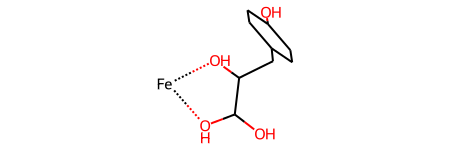

In [2]:
eno_fe2 = pr.parsePDB(workdir + 'all_ligs_rdkit/eno_fe2.pdb')

eno_fe2.getNames()

m_eno = Chem.MolFromPDBFile(workdir + 'all_ligs_rdkit/eno_fe2.pdb')
m_eno


In [10]:
drawit(m_eno)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
cids = AllChem.EmbedMultipleConfs(m_eno, numConfs=100)

drawit(m_eno, confId=50)

RDKit WARNING: [16:26:56] Molecule does not have explicit Hs. Consider calling AddHs()
RDKit ERROR: [16:26:56] UFFTYPER: Unrecognized atom type: Fe3 (13)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [13]:
drawit(m)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

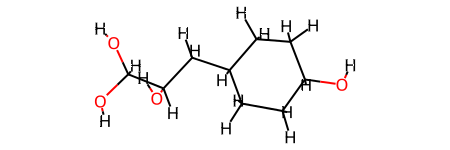

In [14]:
m2=Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
m2

In [15]:
drawit(m2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [4]:
m = Chem.MolFromSmiles('c1cc(ccc1CC(=O)C(=O)O)O')
m2=Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
drawit(m2)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [2]:

m = Chem.MolFromSmiles('O=C(O)C(=O)Cc1c[nH]c2ccccc12')
m2=Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
drawit(m2)



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [3]:
workdir = '/mnt/e/DesignData/ligands/LigandBB/_lig_fe/'

cids = AllChem.EmbedMultipleConfs(m2, numConfs=64)

rmslist = []
AllChem.AlignMolConformers(m2, RMSlist=rmslist)

from rdkit.Chem.rdmolfiles import MolToPDBFile
for i in range(64):
    MolToPDBFile(m2, workdir + 'all_ligs_rdkit_i3pa/i3pa_' + str(i) + '.pdb', confId = i)

In [17]:

m2s = []
for p in os.listdir(workdir + 'all_ligs_rdkit/'):
    if 'm2' not in p:
        continue
    m2s.append(pr.parsePDB(workdir + 'all_ligs_rdkit/' + p))

@> 14 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms an

In [19]:
m2s[0].getNames()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'O1', 'C9', 'O2',
       'O3', 'O4', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8'],
      dtype='<U6')

In [18]:
from metalprot.basic import prody_ext
for m in m2s:
    prody_ext.ordered_sel_transformation(m, eno_fe2, 'O1 C8 C9 O2 O3', 'O4 C2 C1 O2 O1')
    pr.writePDB(workdir + '/all_ligs_rdkit/' + m.getTitle(), m)

In [16]:
lig_eno = Chem.MolFromPDBFile(workdir + 'ENO.pdb')
#lig_eno2=Chem.AddHs(lig_eno)
#AllChem.EmbedMolecule(lig_eno2)

drawit(lig_eno)

cids = AllChem.EmbedMultipleConfs(lig_eno, numConfs=100)
print(cids)
for i in range(100):
    MolToPDBFile(lig_eno, workdir + 'all_ligs_rdkit3/m2_' + str(i) + '.pdb', confId = i)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

RDKit WARNING: [17:13:09] Molecule does not have explicit Hs. Consider calling AddHs()


In [4]:
from metalprot.combs import position_ligand
rdkit_num = 100
outdir = workdir + 'all_ligs_rdkit2/'
os.makedirs(outdir, exist_ok=True)
ligs = position_ligand.generate_rotated_ligs_rdkit('c1cc(ccc1CC(=O)C(=O)O)O', rdkit_num, outdir)

lig_metals = position_ligand.add_metal2ligs(ligs, eno_fe2, 'C9 C8 C7 O3 O2 O1', 'C1 C2 C3 O1 O2 O4', 'FE')

print(lig_metals[0].getNames())

os.makedirs(outdir + 'with_metals/', exist_ok=True)
for lig_m in lig_metals:
    pr.writePDB(outdir + 'with_metals/' + lig_m.getTitle(), lig_m)

@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 21 atoms an

['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'O1' 'C9' 'O2' 'O3' 'O4' 'FE']
